<H1> Trabajo de prediccion de fallecimientos de los pasajeros del 'Titanic' Proyecto 1

In [ ]:
from pickle import FALSE # NO TOCAR SE AGREGO EL SRIPT ", encoding=('ISO-8859-1'), low_memory=FALSE" PARA PODER ASEPTAR EL CSV#

import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data = pd.read_csv("d:/Users/jcruzg/Desktop/PYTHON/Proyecto de Machine Learning/Entrenamiento.csv", encoding=('ISO-8859-1'), low_memory=FALSE)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Variable Objetivo Survived
#Revisar la calidad de los valores nulos dentro del DataFrame
data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

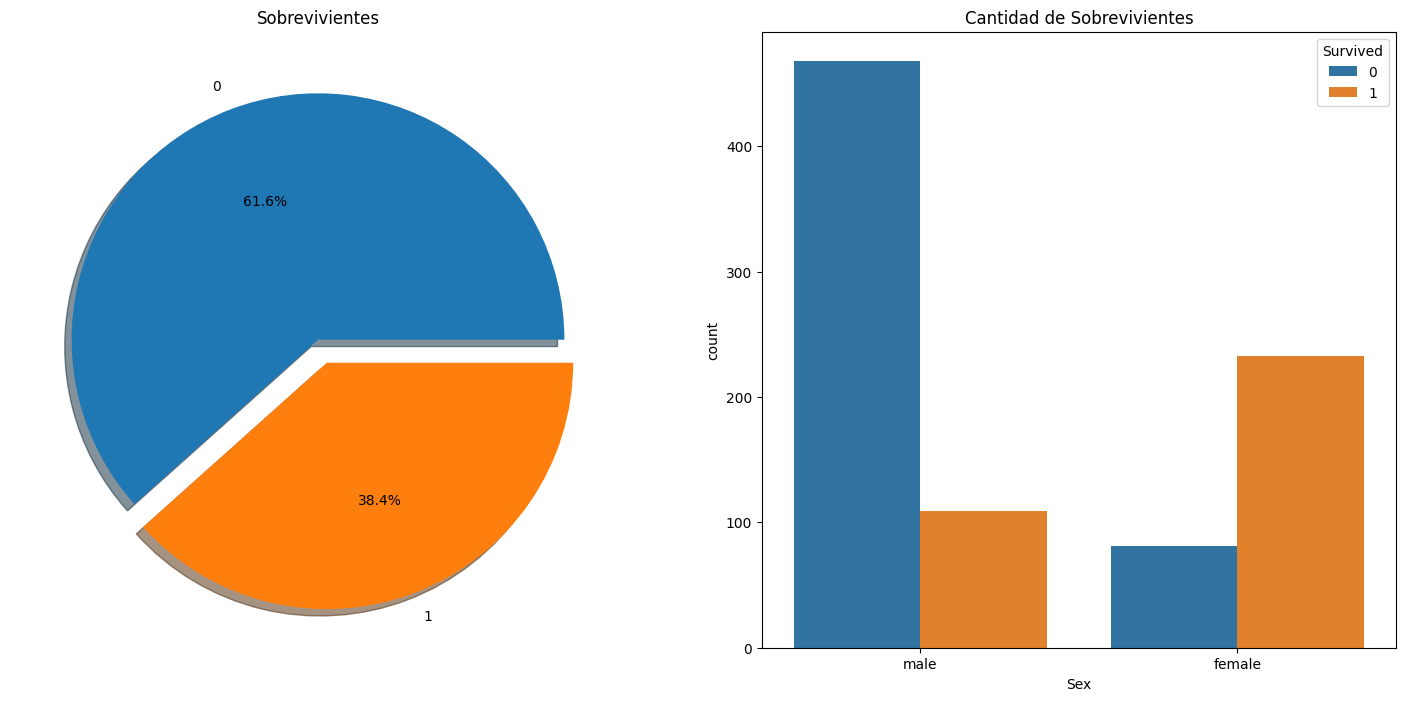

In [ ]:
f, ax = plt.subplots(1,2, figsize = (18,8)) #Define el ancho del lienzo del grafico
data['Survived'].value_counts().plot.pie(autopct = "%1.1f%%" , ax = ax[0], explode = [0,0.1], shadow = True) #Indica las expreciones en porcentajes, la separaracion de los grupos y el sombreado
ax[0]. set_title('Sobrevivientes') #Cambia el titulo
ax[0].set_ylabel('')  #Ayuda a quitar el titulo del eje "X"


sns.countplot(data=data, x="Sex", hue="Survived")
ax[1]. set_title('Cantidad de Sobrevivientes') #importante poner el numero del grafico [1] para que se represente diferentes titulos
plt.show()

In [ ]:
data['Survived'].value_counts() #Recuento de muertes

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
data.groupby(['Sex','Survived'])['Survived'].count() #Sepraracion por muerte

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

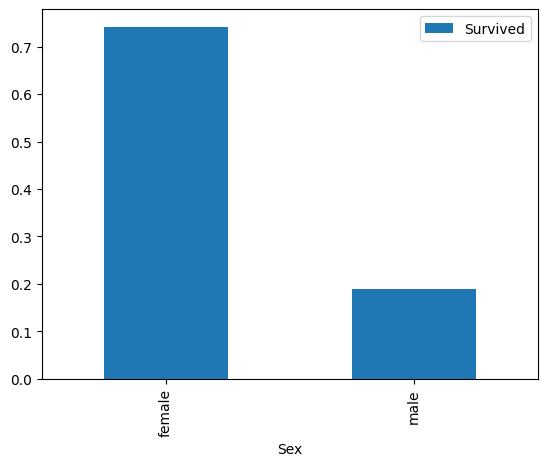

In [ ]:
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar()
plt.show() #Quita el origen de los datos OJO SE PONE HASTA EL FINAL DEL SCRIPT

<H2>Analizando Clases Original Pclass

In [ ]:
pd.crosstab(data['Pclass'],data ['Survived'], margins=True,). style.background_gradient(cmap = 'summer_r') #El codigo de margin agrega la columna de "ALL" y el bacjgraound da un mapa de calor de los dfatos relevantes

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


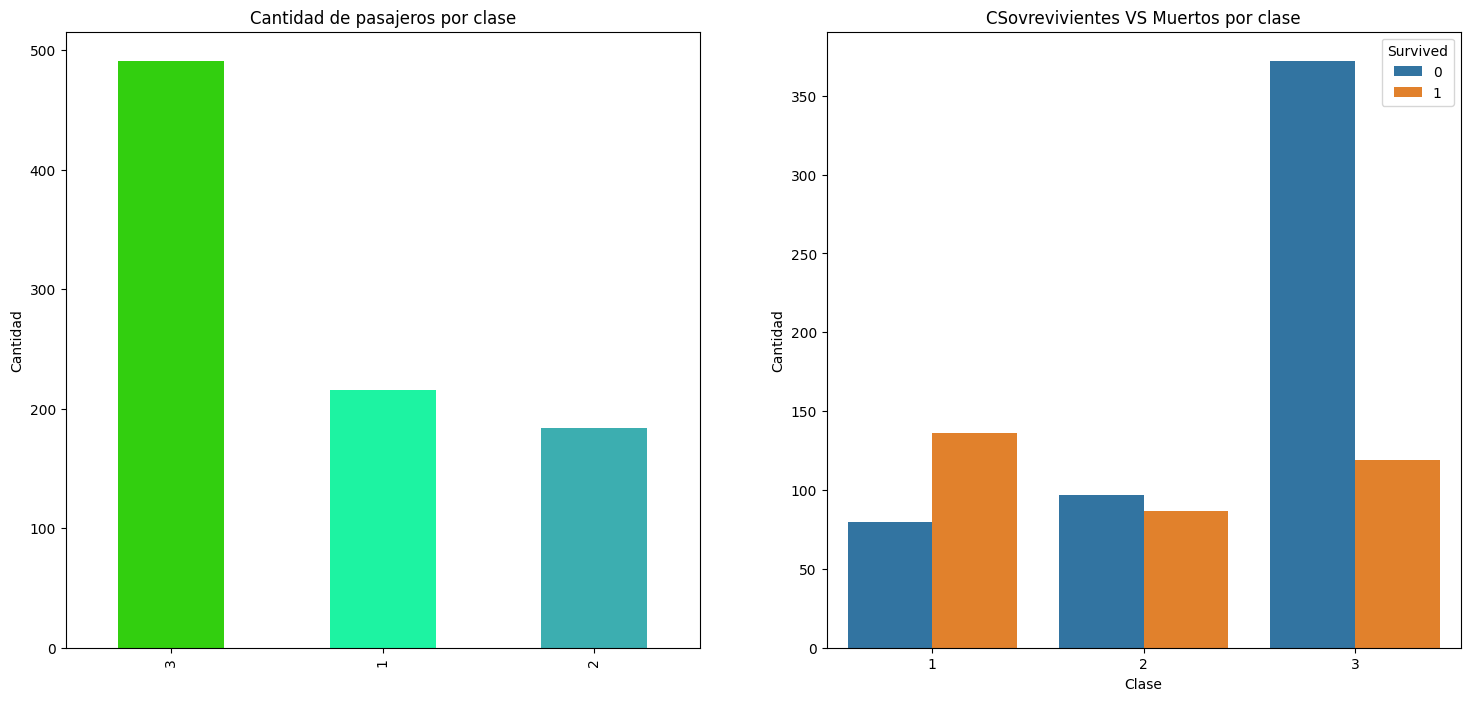

In [ ]:
f, ax = plt.subplots(1,2, figsize = (18,8))
data['Pclass'].value_counts().plot.bar(ax =ax[0], color= ['#32CF0F', '#1DF3A2','#3CAEB0'])
ax[0].set_title('Cantidad de pasajeros por clase')
ax[0].set_ylabel('Cantidad')


sns.countplot(data=data, x="Pclass", hue="Survived")
ax[1].set_title('CSovrevivientes VS Muertos por clase')
ax[1].set_ylabel('Cantidad')
ax[1].set_xlabel('Clase')   

plt.show()

<H2>Analizis de tasa de supervivencia por 'sexo'

In [ ]:
pd.crosstab(
    [data['Sex'], data ['Survived']], data ['Pclass'],margins=True).style.background_gradient(cmap = 'summer_r')

In [ ]:
sns.factorplot(x='Pclass', y='Survived', data= data)
plt.show

sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show

#ESTE AATRIBUTO YA NO EXISTE A PARTIR DE SEPTIEMBRE 2022

AttributeError: module 'seaborn' has no attribute 'factorplot'

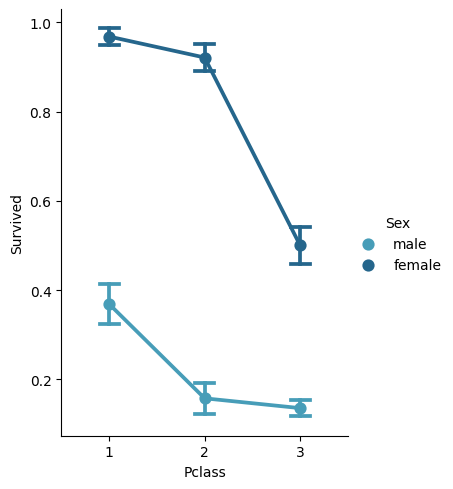

In [ ]:
sns.catplot(
    data=data, x="Pclass", y="Survived", hue="Sex",
    capsize=.2,palette="YlGnBu_d", errorbar="se",
    kind="point", height=5, aspect= .75,)
plt.show()

<H2> Analizando el pasaje (Caracteristicas continua)

In [ ]:
print(
    "El pasaje mas caro : ", data['Fare'].max())
print(
    "El Pasaje mas barato : ", data['Fare'].min())

El pasaje mas caro :  512.3292
El Pasaje mas barato :  0.0


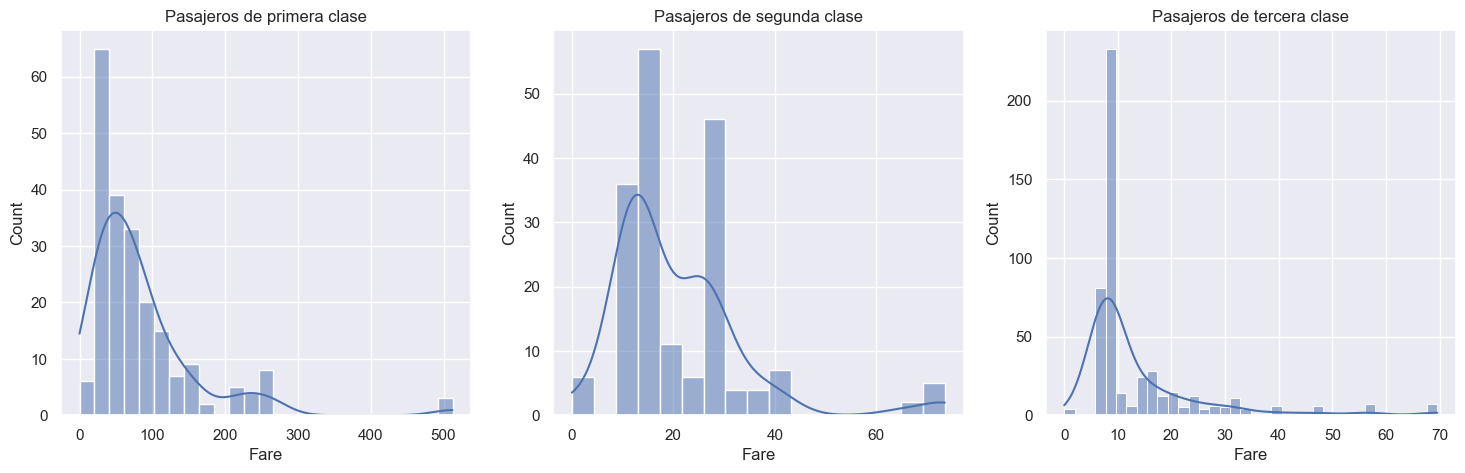

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (18, 5))
sns.histplot( data[data['Pclass'] == 1 ]['Fare'], ax = ax [0], kde=True)
ax [0].set_title('Pasajeros de primera clase')

sns.histplot( data[data['Pclass'] == 2 ]['Fare'], ax = ax [1], kde=True) 
ax [1].set_title('Pasajeros de segunda clase')

sns.histplot( data[data['Pclass'] == 3 ]['Fare'], ax = ax [2], kde=True)
ax [2].set_title('Pasajeros de tercera clase')

plt.show()

#Se actulizo el comando displot por histplot, ya que ete sera eliminado en proximas actualizaciones, funcionaa de igual manera


In [ ]:
d1=data[data["Survived"] >= 1]
d1.plot.bar()


In [ ]:
data[['Age']].groupby(['Survived']).count().plot.bar()
plt.show()

KeyError: 'Survived'

In [ ]:
data.groupby('Age')[['Survived']=='1'].sum().plot.bar()

KeyError: 'Column not found: False'